# **Tarefa 2 - Feature Engineering e Avaliação de Modelos**

####**Dicas:**

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet

- Documentação do pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX

- Documentação do scikit-learn: https://scikit-learn.org/stable/

- Documentação do matplotlib: https://matplotlib.org/stable/index.html

- Documentação do seaborn: https://seaborn.pydata.org/tutorial.html

---

### **Dataset:**

  Este conjunto de dados inclui informações para a estimativa dos níveis de obesidade em indivíduos dos países México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 18 atributos e 2111 registros, que estão rotulados com a variável de classe **NObesity** (Nível de Obesidade), permitindo a classificação dos dados usando os valores **Normal Weight** e **Obesity**.
  
**Colunas:**

1. **Gender**

2. **Age**
3. **Height**
4. **Weight**
5. **family_history_with_overweight** → Algum membro da família já sofreu ou sofre de excesso de peso?
6. **FAVC** → Você come alimentos altamente calóricos com frequência?
7. **FCVC** → Você costuma comer vegetais nas suas refeições?
8. **NCP** → Quantas refeições principais você faz diariamente?
9. **CAEC** → Você come algo entre as refeições?
10. **SMOKE** → Você fuma?
11. **CH2O** → Quanto de água você bebe diariamente?
12. **SCC** → Você monitora as calorias que consome diariamente?
13. **FAF** → Com que frequência você pratica atividade física?
14. **TUE** → Quanto tempo você utiliza dispositivos tecnológicos como celular, videogames, televisão, computador e outros?
15. **CALC** → Com que frequência você consome álcool?
16. **MTRANS** → Qual meio de transporte você costuma usar?
17. **TW1** → Quantas calorias você consumiu na última refeição?
18. **NObeyesdad** → Nível de obesidade (alvo)



## **Importe os Pacotes**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## **Crie os datasets**
### **Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD**

In [5]:
df = pd.read_csv("dataset_obesity-2024_2.csv")

## **Feature Engineering**
Olhando para o dataset, que features poderiam ser criadas que seriam úteis para nossa tarefa de predição?

**Dica que quase não é dica**: IMC deve ser interessante.... Crie uma coluna IMC e discretize os seus dados em grupos e veja se há alguma relação com a variável de nível de obesidade (alvo)

In [6]:
# IMC = Weight / Height
df["IMC"] = df["Weight"] / (df["Height"] ** 2)

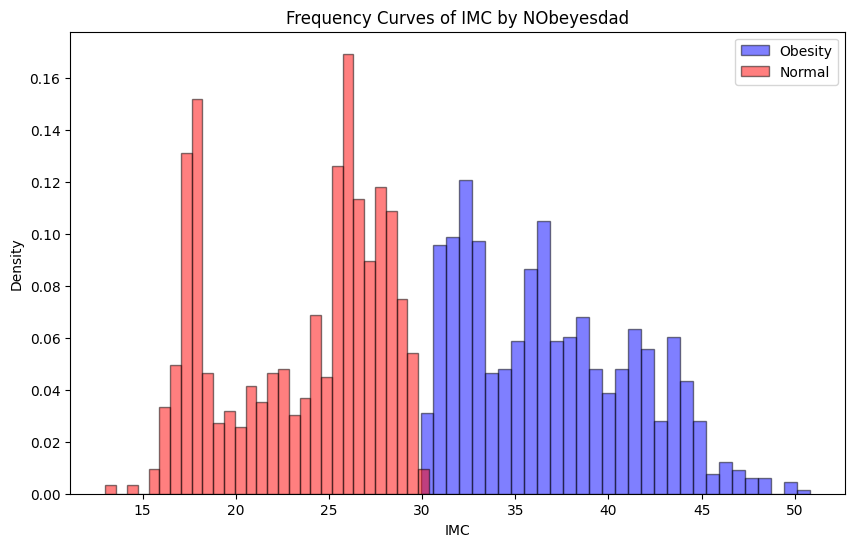

In [19]:
df[["Weight","Height","IMC", "NObeyesdad"]]

group1 = df[df['NObeyesdad'] == 'Obesity']
group2 = df[df['NObeyesdad'] == 'Normal Weight']

# Plot the frequency curves
plt.figure(figsize=(10, 6))

# Plot for the 'Obesity' group
plt.hist(group1['IMC'], bins=30, density=True, alpha=0.5, label='Obesity', color='blue', edgecolor='black')

# Plot for the 'Normal' group
plt.hist(group2['IMC'], bins=30, density=True, alpha=0.5, label='Normal', color='red', edgecolor='black')

# Add labels and title
plt.xlabel('IMC')
plt.ylabel('Density')
plt.title('Frequency Curves of IMC by NObeyesdad')
plt.legend()

# Show the plot
plt.show()

## **Pré-Processe os dados novamente**
**Dica 1:**
- Aproveite o que foi feito no trabalho anterior (remoção de outliers, transformação de valores e etc), lembrando que agora será necessario pré-processar as colunas novas criadas

**Dica 2:**
- Se estiver tendo problema com o OneHotEncoder criando valores NaN, resete o index do dataframe df original e do dataframe criado para o onehot para alinhar os dados

## **Criação de Conjuntos de Treinamento e Teste**

Divida os dados em conjuntos de treino, validação e teste. Para isso, selecione aleatoriamente e sem reposição 75% dos registros para o conjunto de treinamento. As observações restantes (25%) serão ditribidas igualmente para os conjuntos de validação e teste.

Dicas:
- Fixe a semente de geração de dados aleatórios (escolha um número), utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

- Para fazer a divisão de treino, validação, teste use a função `train_test_split()`


## **Treine e Teste o Modelo de KNN**

Treinar cinco versões diferentes do modelo K-Nearest Neighbors (KNN) utilizando valores variados para o parâmetro K.

**Dica:**
- Busque pela função `KNeighborsClassifier(n_neighbors=?)` da biblioteca `scikitlearn`

### **Interprete e explique a Matriz de Confusão gerada**

Escreva aqui...

### **Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de validação.**

**Dica:**
- Para calcular as métricas do modelo busque pelas funções `accuracy_score()`, `recall_score()`, `precision_score()`, `f1_score()`

## **Baseado no desempenho em validação, escolher o melhor modelo utilizando uma das métricas (justificando a escolha da métrica)**

## **Avalie o modelo escolhido utilizando o dataset de teste**

## **Mostre uma análise comparativa entre validação e teste para o modelo escolhido**
**Observação:** Se houver uma discrepância muito grande nos resultados, algo pode estar errado, verifique seu treinamento e avaliação do modelo.